In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
from pandas import read_excel
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import math
import matplotlib.pyplot as plt
import os
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from pca import pca
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import xgboost
from xgboost import XGBClassifier
from pandas import MultiIndex
from pandas import Int64Index
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/dh/dgy1v49j4rs7lcfxbxnn5bzm0000gn/T/ipykernel_13265/1780960336.py:54: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index


# Read data from file

In [2]:
data = pd.read_excel('dataset_final.xlsx', sheet_name = 'Dataset_Complete_modified')

In [3]:
data['A4'] = data['A4'].astype(float)

In [4]:
data

Polymer Index    type_A type_B1 type_B2 type_C  composition_A  \
0                1  Boc-AEAm    PEAm    None   HEAm            0.5   
1                2  Boc-AEAm    PEAm    None   HEAm            0.5   
2                3  Boc-AEAm    PEAm    None   HEAm            0.5   
3                4  Boc-AEAm    PEAm    None   None            0.7   
4                5  Boc-AEAm    PEAm    None   None            0.7   
5                6  Boc-AEAm    PEAm    None   None            0.7   
6                7  Boc-AEAm    PEAm    None   HEAm            0.5   
7                8  Boc-AEAm    PEAm    None   HEAm            0.5   
8                9  Boc-AEAm    PEAm    None   HEAm            0.5   
9               10  Boc-AEAm    PEAm    None   HEAm            0.5   
10              11  Boc-AEAm    PEAm    None   HEAm            0.5   
11              13  Boc-AEAm    PEAm    None   None            0.7   
12              14  Boc-AEAm    PEAm    None   None            0.7   
13              15  Boc-AEAm    PEAm    None   HEAm            0.5   
14              16  Boc-AEAm    PEAm    None   HEAm            0.5   
15              17  Boc-AEAm    PEAm    None   HEAm            0.5   
16              18  Boc-AEAm    PEAm    None   HEAm            0.5   
17              19  Boc-AEAm    PEAm    None   HEAm            0.5   
18              20  Boc-AEAm    PEAm    None   HEAm            0.5   
19              21  Boc-AEAm    PEAm    None   HEAm            0.5   
20              22  Boc-AEAm    PEAm    None   HEAm            0.5   
21              23  Boc-AEAm    PEAm    None   HEAm            0.5   
22              24  Boc-AEAm    PEAm    None   HEAm            0.5   
23              25  Boc-AEAm    PEAm    None   HEAm            0.5   
24              26  Boc-AEAm    PEAm    None   HEAm            0.5   
25              27  Boc-AEAm    PEAm    None   HEAm            0.5   
26              28  Boc-AEAm    PEAm    None   HEAm            0.5   
27              29  Boc-AEAm    PEAm    None   HEAm            0.5   
28              30  Boc-AEAm    PEAm    None   HEAm            0.5   
29              31  Boc-AEAm    PEAm    None   HEAm            0.5   
30              32  Boc-AEAm    PEAm    None   HEAm            0.5   
31              33  Boc-AEAm    PEAm    None   HEAm            0.5   
32              34  Boc-AEAm    PEAm    None   PEGA            0.5   
33              35  Boc-AEAm    PEAm    None   DEGA            0.5   
34              36  Boc-AEAm     EHA    None   HEAm            0.5   
35              37  Boc-AEAm     EHA    None   PEGA            0.5   
36              38  Boc-AEAm     EHA    None   DEGA            0.5   
37              42  Boc-AEAm    PEAm   NIPAm   HEAm            1.0   
38              43  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
39              44  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
40              45  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
41              46  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
42              47  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
43              48  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
44              49  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
45              50  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
46              51  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
47              52  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
48              53  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
49              54  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
50              55  Boc-AEAm    PEAm   NIPAm   HEAm            0.7   
51              56  Boc-AEAm    PEAm   NIPAm   HEAm            0.5   
52              57  Boc-AEAm    PEAm   NIPAm   HEAm            0.5   
53              58  Boc-AEAm    PEAm   NIPAm   HEAm            0.5   
54              59  Boc-AEAm    PEAm   NIPAm   HEAm            0.5   
55              60  Boc-AEAm    PEAm   NIPAm   HEAm            0.5   
56             

# Calculate pairwise correlation

In [5]:
data.corr()

/var/folders/dh/dgy1v49j4rs7lcfxbxnn5bzm0000gn/T/ipykernel_13265/1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Polymer Index  composition_A  composition_B1  \
Polymer Index          1.000000      -0.237395       -0.209524   
composition_A         -0.237395       1.000000       -0.282589   
composition_B1        -0.209524      -0.282589        1.000000   
composition_B2         0.402446      -0.310371       -0.399126   
composition_C          0.045304      -0.412450       -0.309069   
Number of blocks      -0.515925      -0.010745        0.271207   
dpn                   -0.249226      -0.004903        0.120026   
Target                -0.410508       0.113958        0.257981   
NMR                   -0.556035       0.207758        0.273500   
GPC                   -0.257679      -0.182915        0.010997   
clogP                  0.634861      -0.479834        0.884044   
Dispersity             0.689745       0.080743       -0.216975   
A1                    -0.263964       0.099391        0.123526   
B1                     0.473301       0.023722       -0.242328   
C1                     0.606697      -0.075715       -0.303346   
A2                    -0.243827       0.045402        0.129752   
B2                    -0.438501      -0.031455        0.221584   
C2                    -0.387557      -0.029569        0.180416   
A3                    -0.226511      -0.016070        0.118880   
B3                    -0.190109      -0.015225        0.112632   
C3                    -0.172808      -0.013064        0.096645   
A4                          NaN            NaN             NaN   
B4                    -0.151171      -0.011290        0.083517   
C4                    -0.151171      -0.011290        0.083517   
cLogP_predicted       -0.679035      -0.086684        0.364220   

                  composition_B2  composition_C  Number of blocks       dpn  \
Polymer Index           0.402446       0.045304         -0.515925 -0.249226   
composition_A          -0.310371      -0.412450         -0.010745 -0.004903   
composition_B1         -0.399126      -0.309069          0.271207  0.120026   
composition_B2          1.000000      -0.286314         -0.275958 -0.117630   
composition_C          -0.286314       1.000000          0.016395  0.002952   
Number of blocks       -0.275958       0.016395          1.000000  0.280251   
dpn                    -0.117630       0.002952          0.280251  1.000000   
Target                 -0.274649      -0.096356          0.386098  0.884207   
NMR                    -0.471571      -0.010390          0.408109  0.766664   
GPC                    -0.175124       0.344606          0.324969  0.784606   
clogP                   0.186638      -0.517585               NaN       NaN   
Dispersity              0.166071      -0.030110         -0.228574 -0.094875   
A1                     -0.132917      -0.089494          0.029182 -0.031850   
B1                      0.254903      -0.036993         -0.846407 -0.204843   
C1                      0.315025       0.062952         -0.806769 -0.286753   
A2                     -0.127162      -0.047429          0.452140  0.114781   
B2                     -0.228049       0.038591          0.623867  0.265455   
C2                     -0.214375       0.063775          0.595649  0.222880   
A3                     -0.116507       0.014118          0.632507  0.203834   
B3                     -0.110385       0.013376          0.467679  0.084057   
C3                     -0.094716       0.011478          0.401295  0.118917   
A4                           NaN            NaN               NaN       NaN   
B4                     -0.081850       0.009919          0.541927  0.062328   
C4                     -0.081850       0.009919          0.541927  0.062328   
cLogP_predicted        -0.102905      -0.170816          0.222334  0.096098   

                    Target       NMR       GPC  ...        A2        B2  \
Polymer Index    -0.410508 -0.556035 -0.257679  ... -0.243827 -0.438501   
composition_A     0.113958  0.207758 -0.182915  ...  0.045402 -0.031455   
composition_B1    0.2

In [6]:
data = data.drop(columns=['composition_C','Polymer Index','Dispersity','clogP','block_sequence_theoretical', 'block_sequence_experimental','MIC_PAO1', 'MIC_PA','MIC_EC', 'MIC_AB', 'MIC_SA', 'MIC_MSmeg','GPC','Target','NMR'])

In [7]:
data = data.replace({'>128':128,'>256':256, '32-64':64, '64-128':128,'128-256':256})
#data = data['MIC_PAO1_PA'].astype(str).astype(float)


# Assign classes based on MIC values

In [8]:
#data['Category'] = data['MIC_PAO1_PA'].apply(lambda x: 0 if x <= 64 else 1)
data['Category'] = data['MIC_PAO1_PA'].apply(lambda x: 1 if x <= 64 else 0)
#data_original['Category'] = data_original['MIC values'].apply(lambda x: 0 if x <= 16 else 1)
data = data.drop(columns = ['MIC_PAO1_PA'])

# Creating dummy variables for monomer types

In [9]:
data_with_dummies = pd.get_dummies(data, drop_first=True)
data_with_dummies

composition_A  composition_B1  composition_B2  Number of blocks  dpn  \
0              0.5            0.30            0.00                 1  100   
1              0.5            0.30            0.00                 1   40   
2              0.5            0.30            0.00                 1   20   
3              0.7            0.30            0.00                 1  100   
4              0.7            0.30            0.00                 1   40   
5              0.7            0.30            0.00                 1   20   
6              0.5            0.30            0.00                 2  100   
7              0.5            0.30            0.00                 2   40   
8              0.5            0.30            0.00                 2   20   
9              0.5            0.30            0.00                 3  100   
10             0.5            0.30            0.00                 3  100   
11             0.7            0.30            0.00                 2   40   
12             0.7            0.30            0.00                 2   20   
13             0.5            0.30            0.00                 2  100   
14             0.5            0.30            0.00                 2   40   
15             0.5            0.30            0.00                 2   20   
16             0.5            0.30            0.00                 3   40   
17             0.5            0.30            0.00                 3   40   
18             0.5            0.30            0.00                 4   50   
19             0.5            0.30            0.00                 4   50   
20             0.5            0.30            0.00                 2  100   
21             0.5            0.30            0.00                 2   40   
22             0.5            0.30            0.00                 2   20   
23             0.5            0.30            0.00                 2  100   
24             0.5            0.30            0.00                 2   40   
25             0.5            0.30            0.00                 2   20   
26             0.5            0.30            0.00                 3   40   
27             0.5            0.30            0.00                 3   40   
28             0.5            0.30            0.00                 3   40   
29             0.5            0.15            0.00                 1   40   
30             0.5            0.15            0.00                 2   40   
31             0.5            0.30            0.00                 1   40   
32             0.5            0.30            0.00                 1   40   
33             0.5            0.30            0.00                 1   40   
34             0.5            0.30            0.00                 1   40   
35             0.5            0.30            0.00                 1   40   
36             0.5            0.30            0.00                 1   40   
37             1.0            0.00            0.00                 1   40   
38             0.7            0.00            0.00                 1   40   
39             0.7            0.10            0.00                 1   40   
40             0.7            0.07            0.03                 1   40   
41             0.7            0.03            0.07                 1   40   
42             0.7            0.00            0.10                 1   40   
43             0.7            0.20            0.00                 1   40   
44             0.7            0.13            0.07                 1   40   
45             0.7            0.07            0.13                 1   40   
46             0.7            0.00            0.20                 1   40   
47             0.7            0.30            0.00                 1   40   
48             0.7            0.20            0.10                 1   40   
49             0.7            0.10            0.20                 1   40   
50             0.7            0.00            0.30                 1   40   
5

In [10]:
data_with_dummies['A4'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [11]:
data_with_dummies.to_csv('modified_data.csv', index=False)

In [12]:
Y = data_with_dummies['Category']
Y = Y.reset_index()
Y = Y.drop(columns = ['index'])
#Y = pd.DataFrame(Y)
X = data_with_dummies.drop(columns = ['Category'])

# Standardization of the whole data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns, index = X.index.values.tolist())

numpy.ndarray

In [16]:
X_scaled

pandas.core.frame.DataFrame

# Dividing the data into TRAIN and TEST sets.

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0, stratify = Y) 

In [45]:
Y_test.value_counts()

Category
0           26
1            6
dtype: int64

In [46]:
Y_train.value_counts()

Category
0           104
1            21
dtype: int64

# Model Testing

In [47]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [49]:
params = {'n_estimators': [10,100,200,400,500,1000], 'max_depth': [10,20,30,40,50,60,70,80,90,100,None], 'max_features': ['auto', 'sqrt','log2'], 'min_samples_leaf': [1,2,4], 'min_samples_split': [2,5,10], 'bootstrap': [True,False],'class_weight': ['balanced']}


In [50]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
rf_op = RandomizedSearchCV(rf, params, n_iter=20, cv=cv, scoring='f1', random_state=0, verbose=1, n_jobs=-1)

In [51]:
rf_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


/Users/yimengjin/Desktop/Thesis/Thesis_Yimeng/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yimengjin/Desktop/Thesis/Thesis_Yimeng/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yimengjin/Desktop/Thesis/Thesis_Yimeng/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past b

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 200, 400, 500,
                                                         1000]},
                   random_state=0, scoring='f1', verbose=1)

In [52]:
rf_op.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20,
 'class_weight': 'balanced',
 'bootstrap': True}

In [53]:
rf = RandomForestClassifier(random_state=0, n_estimators=rf_op.best_params_['n_estimators'], min_samples_split=rf_op.best_params_['min_samples_split'], min_samples_leaf=rf_op.best_params_['min_samples_leaf'], max_features=rf_op.best_params_['max_features'], max_depth=rf_op.best_params_['max_depth'], class_weight = rf_op.best_params_['class_weight'],bootstrap=rf_op.best_params_['bootstrap'])

In [54]:
arr = cross_val_score(rf, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.875     , 0.87096774, 0.93548387, 0.90322581, 0.90625   ,
       0.90322581, 0.87096774, 0.93548387, 0.9375    , 0.93548387,
       0.96774194, 0.70967742, 0.9375    , 0.96774194, 0.83870968,
       0.83870968, 0.90625   , 0.96774194, 0.90322581, 0.83870968])

In [55]:
np.mean(arr)

0.8974798387096774

In [56]:
rf.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', min_samples_split=5,
                       random_state=0)

In [64]:
Y_rf = rf.predict(X_test)

In [58]:
confusion_matrix(Y_test,Y_rf)

array([[25,  1],
       [ 3,  3]])

In [59]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_rf, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.89      0.96      0.93        26
        good       0.75      0.50      0.60         6

    accuracy                           0.88        32
   macro avg       0.82      0.73      0.76        32
weighted avg       0.87      0.88      0.86        32



In [60]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [61]:
Y_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

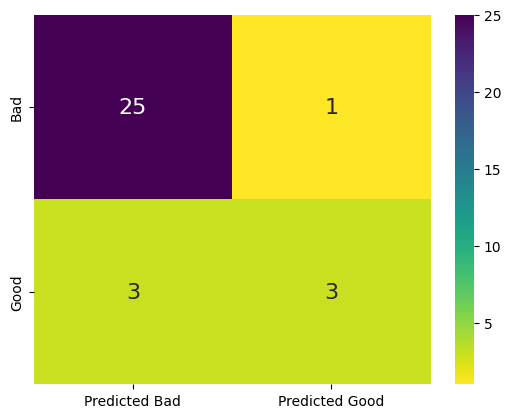

In [62]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_rf),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

In [63]:
import shap
class_names = ['Bad','Good']
shap_values = shap.TreeExplainer(rf).shap_values(X_test)
shap.summary_plot(shap_values, X_test,class_names= class_names)

ModuleNotFoundError: No module named 'shap'

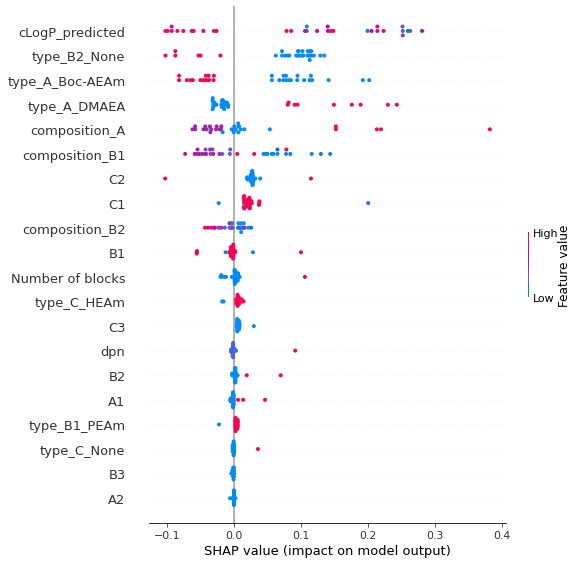

In [313]:
shap.summary_plot(shap_values[0], X_test.values, feature_names = X_test.columns)

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0])


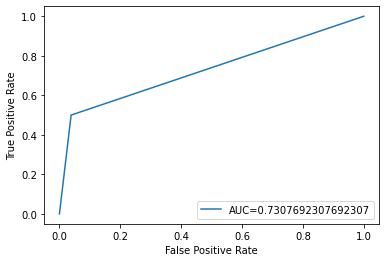

In [314]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_rf)
auc = metrics.roc_auc_score(Y_test, Y_rf)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [315]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [316]:
params = {'max_iter': [500, 800, 1000], 'C': [0.001,0.01,0.1,1.0, 10.0, 100.0, 1000.0],'class_weight': ['balanced']}

In [317]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
lr_op = RandomizedSearchCV(lr, params, n_iter=20, cv=cv, scoring='f1', random_state=0, n_jobs=-1, verbose=1)

In [318]:
lr_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0],
                                        'class_weight': ['balanced'],
                                        'max_iter': [500, 800, 1000]},
                   random_state=0, scoring='f1', verbose=1)

In [319]:
lr_op.best_params_

{'max_iter': 800, 'class_weight': 'balanced', 'C': 10.0}

In [320]:
lr = LogisticRegression(max_iter=lr_op.best_params_['max_iter'], class_weight = lr_op.best_params_['class_weight'], C = lr_op.best_params_['C'], random_state = 0)

In [321]:
arr = cross_val_score(lr, X_train,Y_train.values.ravel(), cv=cv)
arr

array([0.90625   , 0.77419355, 0.80645161, 0.87096774, 0.84375   ,
       0.93548387, 0.83870968, 0.90322581, 0.84375   , 0.83870968,
       0.90322581, 0.74193548, 0.875     , 0.90322581, 0.93548387,
       0.74193548, 0.78125   , 0.93548387, 0.96774194, 0.80645161])

In [322]:
np.mean(arr)

0.8576612903225806

In [323]:
lr.fit(X_train,Y_train.values.ravel())

LogisticRegression(C=10.0, class_weight='balanced', max_iter=800,
                   random_state=0)

In [324]:
Y_lr = lr.predict(X_test)

In [325]:
confusion_matrix(Y_test,Y_lr)

array([[24,  2],
       [ 1,  5]])

In [326]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_lr, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.96      0.92      0.94        26
        good       0.71      0.83      0.77         6

    accuracy                           0.91        32
   macro avg       0.84      0.88      0.86        32
weighted avg       0.91      0.91      0.91        32



In [327]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [328]:
Y_lr

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

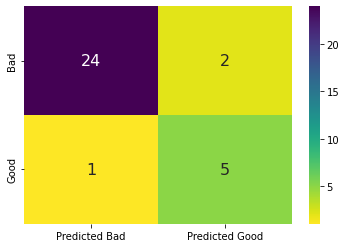

In [329]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_lr),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

In [330]:
lr.coef_


array([[-0.04048812,  1.59393767,  0.98258476, -0.94744213, -0.52467381,
        -0.68533359,  0.74737888, -0.13099857, -0.49305251, -0.93374911,
         2.13291081, -0.21563964, -1.13270461,  1.48698793,  0.        ,
         0.19401179,  0.19401179,  1.48306883,  2.27746048, -1.2779624 ,
        -0.29586468,  1.58298375, -0.12636668, -1.52204536,  0.27842249]])

In [331]:
lr_table = pd.DataFrame()
lr_table['features']=X.columns
lr_table['coefficients']=abs(lr.coef_[0,:])
lr_table

features  coefficients
0      composition_A      0.040488
1     composition_B1      1.593938
2     composition_B2      0.982585
3   Number of blocks      0.947442
4                dpn      0.524674
5                 A1      0.685334
6                 B1      0.747379
7                 C1      0.130999
8                 A2      0.493053
9                 B2      0.933749
10                C2      2.132911
11                A3      0.215640
12                B3      1.132705
13                C3      1.486988
14                A4      0.000000
15                B4      0.194012
16                C4      0.194012
17   cLogP_predicted      1.483069
18   type_A_Boc-AEAm      2.277460
19      type_A_DMAEA      1.277962
20      type_B1_PEAm      0.295865
21      type_B2_None      1.582984
22       type_C_HEAm      0.126367
23       type_C_None      1.522045
24       type_C_PEGA      0.278422

In [332]:
lr_table.sort_values(by=['coefficients'])

features  coefficients
14                A4      0.000000
0      composition_A      0.040488
22       type_C_HEAm      0.126367
7                 C1      0.130999
15                B4      0.194012
16                C4      0.194012
11                A3      0.215640
24       type_C_PEGA      0.278422
20      type_B1_PEAm      0.295865
8                 A2      0.493053
4                dpn      0.524674
5                 A1      0.685334
6                 B1      0.747379
9                 B2      0.933749
3   Number of blocks      0.947442
2     composition_B2      0.982585
12                B3      1.132705
19      type_A_DMAEA      1.277962
17   cLogP_predicted      1.483069
13                C3      1.486988
23       type_C_None      1.522045
21      type_B2_None      1.582984
1     composition_B1      1.593938
10                C2      2.132911
18   type_A_Boc-AEAm      2.277460

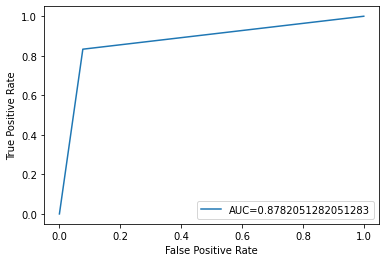

In [333]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_lr)
auc = metrics.roc_auc_score(Y_test, Y_lr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# SVC

In [334]:
from sklearn.svm import SVC
svc=SVC()

In [335]:
params = {'C': [0.0001, 0.001, 0.01,0.1,1,10,100,1000], 'kernel' : ['linear', 'poly', 'rbf'],'gamma': [1000,100,10,1,0.1,0.01,0.001,0.0001],'class_weight':['balanced']}

In [336]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
svc_op = RandomizedSearchCV(svc, params, n_iter=5, cv=cv, scoring='f1', random_state=0, n_jobs=-1, verbose=1)

In [337]:
svc_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 5 candidates, totalling 100 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'class_weight': ['balanced'],
                                        'gamma': [1000, 100, 10, 1, 0.1, 0.01,
                                                  0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=0, scoring='f1', verbose=1)

In [338]:
svc_op.best_params_

{'kernel': 'poly', 'gamma': 1000, 'class_weight': 'balanced', 'C': 1}

In [339]:
svc = SVC(kernel = svc_op.best_params_['kernel'], gamma=svc_op.best_params_['gamma'], C=svc_op.best_params_['C'], random_state = 0, class_weight = 'balanced')

In [340]:
arr = cross_val_score(svc, X_train,Y_train.values.ravel(), cv=cv)
arr

array([0.9375    , 0.87096774, 0.90322581, 0.80645161, 0.875     ,
       0.87096774, 0.87096774, 0.93548387, 0.875     , 0.90322581,
       0.87096774, 0.83870968, 0.9375    , 0.96774194, 0.83870968,
       0.80645161, 0.78125   , 0.93548387, 0.87096774, 0.83870968])

In [341]:
np.mean(arr)

0.8767641129032258

In [342]:
svc.fit(X_train,Y_train.values.ravel())

SVC(C=1, class_weight='balanced', gamma=1000, kernel='poly', random_state=0)

In [343]:
Y_svc = svc.predict(X_test)

In [344]:
confusion_matrix(Y_test,Y_svc)

array([[22,  4],
       [ 1,  5]])

In [345]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_lr, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.96      0.92      0.94        26
        good       0.71      0.83      0.77         6

    accuracy                           0.91        32
   macro avg       0.84      0.88      0.86        32
weighted avg       0.91      0.91      0.91        32



In [346]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [347]:
Y_svc

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

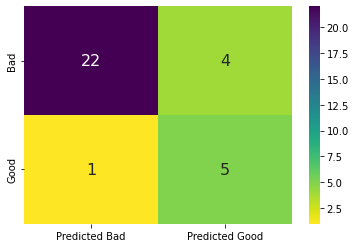

In [348]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_svc),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

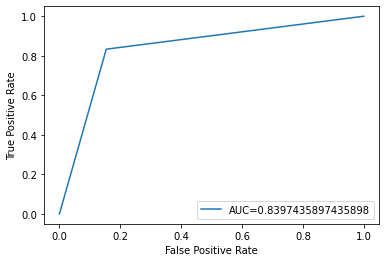

In [349]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_svc)
auc = metrics.roc_auc_score(Y_test, Y_svc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# XGBoost

In [350]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [351]:
params = {'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000],'scale_pos_weight' : [4.0, 4.68, 5.0, 6.0]}

In [352]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
xgb_op = RandomizedSearchCV(xgb, params, n_iter=20, cv=cv, scoring='f1', random_state=0, n_jobs=-1, verbose=1)

In [353]:
xgb_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from panda

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

[11:56:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_dept...
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                            

In [354]:
xgb_op.best_params_

{'subsample': 0.7999999999999999,
 'scale_pos_weight': 4.0,
 'n_estimators': 500,
 'max_depth': 15,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.6}

In [355]:
xgb = XGBClassifier(random_state=0, n_estimators=xgb_op.best_params_['n_estimators'], max_depth=xgb_op.best_params_['max_depth'], learning_rate=xgb_op.best_params_['learning_rate'], colsample_bytree=xgb_op.best_params_['colsample_bytree'], colsample_bylevel=xgb_op.best_params_['colsample_bylevel'], subsample=xgb_op.best_params_['subsample'],scale_pos_weight = xgb_op.best_params_['scale_pos_weight'])

In [356]:
arr = cross_val_score(xgb, X_train,Y_train.values.ravel(), cv=cv)
arr

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.875     , 0.87096774, 0.93548387, 0.90322581, 0.90625   ,
       0.87096774, 0.87096774, 0.93548387, 0.90625   , 0.87096774,
       0.96774194, 0.70967742, 0.90625   , 0.96774194, 0.87096774,
       0.80645161, 0.90625   , 0.93548387, 0.90322581, 0.77419355])

In [357]:
np.mean(arr)

0.8846774193548386

In [358]:
xgb.fit(X_train,Y_train.values.ravel())

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[11:56:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=4.0,
              subsample=0.7999999999999999, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [359]:
Y_xgb = xgb.predict(X_test)

In [360]:
confusion_matrix(Y_test,Y_xgb)

array([[25,  1],
       [ 3,  3]])

In [361]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_xgb, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.89      0.96      0.93        26
        good       0.75      0.50      0.60         6

    accuracy                           0.88        32
   macro avg       0.82      0.73      0.76        32
weighted avg       0.87      0.88      0.86        32



In [362]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [363]:
Y_xgb

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

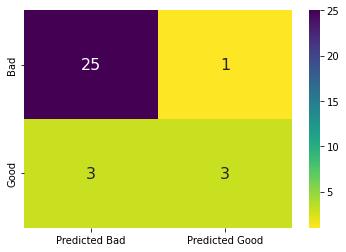

In [364]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_xgb),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

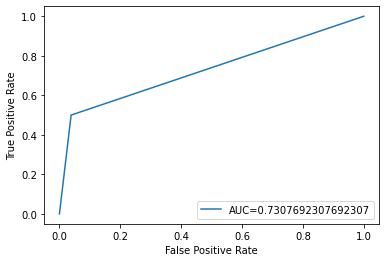

In [365]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_xgb)
auc = metrics.roc_auc_score(Y_test, Y_xgb)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Neural Network Classifier

In [366]:
from sklearn.neural_network import MLPClassifier

In [367]:
ann = MLPClassifier()

In [368]:
params = {'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)], 'activation': ['identity', 'logistic','tanh', 'relu'], 'solver': ['lbfgs','sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive'], 'max_iter': [3000]}

In [369]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
ann_op = RandomizedSearchCV(ann, params, n_iter=20, cv=cv, scoring='f1', verbose=1, random_state=0, n_jobs=-1)

In [370]:
ann_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=MLPClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(1,), (2,), (3,),
                                                               (4,), (5,), (6,),
                                                               (7,), (8,), (9,),
                                                               (10,), (11,),
                                                               (12,), (13,),
                                                               (14,), (15,),
                                                               (16,), (17,),
                                                               (18,), (19,),


In [371]:
ann_op.best_params_

{'solver': 'lbfgs',
 'max_iter': 3000,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (10,),
 'alpha': 0.05,
 'activation': 'logistic'}

In [372]:
ann = MLPClassifier(max_iter = ann_op.best_params_['max_iter'], random_state=0, solver=ann_op.best_params_['solver'], learning_rate=ann_op.best_params_['learning_rate'], hidden_layer_sizes=ann_op.best_params_['hidden_layer_sizes'], alpha=ann_op.best_params_['alpha'], activation=ann_op.best_params_['activation'])

In [373]:
arr = cross_val_score(ann, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.9375    , 0.80645161, 0.87096774, 0.90322581, 0.875     ,
       0.90322581, 0.90322581, 0.90322581, 0.875     , 0.93548387,
       0.90322581, 0.77419355, 0.90625   , 0.93548387, 0.93548387,
       0.80645161, 0.8125    , 0.90322581, 0.93548387, 0.80645161])

In [374]:
np.mean(arr)

0.881602822580645

In [375]:
ann.fit(X_train,Y_train.values.ravel())

MLPClassifier(activation='logistic', alpha=0.05, hidden_layer_sizes=(10,),
              learning_rate='adaptive', max_iter=3000, random_state=0,
              solver='lbfgs')

In [376]:
Y_ann = ann.predict(X_test)

In [377]:
confusion_matrix(Y_test,Y_ann)

array([[25,  1],
       [ 2,  4]])

In [378]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_ann, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.93      0.96      0.94        26
        good       0.80      0.67      0.73         6

    accuracy                           0.91        32
   macro avg       0.86      0.81      0.84        32
weighted avg       0.90      0.91      0.90        32



In [379]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [380]:
Y_ann

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

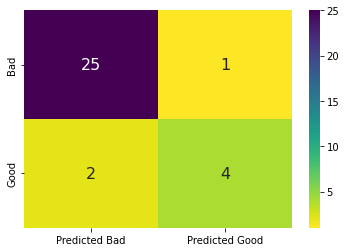

In [381]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_ann),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

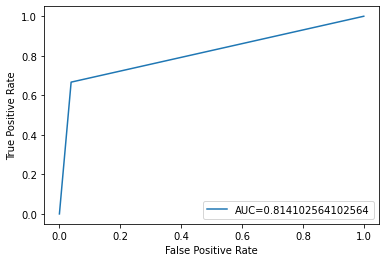

In [382]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_ann)
auc = metrics.roc_auc_score(Y_test, Y_ann)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Decision Tree Classifier

In [383]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [384]:
params = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"], 'splitter' : ["best", "random"], 'max_features' :  ["auto", "sqrt", "log2"], 'class_weight' : ['balanced']}

In [385]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
dtc_op = RandomizedSearchCV(dtc, params, n_iter=20, cv=cv, scoring='f1', verbose=1, random_state=0, n_jobs=-1)

In [386]:
dtc_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=DecisionTreeClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'splitter': ['best', 'random']},
                   random_state=0, scoring='f1', verbose=1)

In [387]:
dtc_op.best_params_

{'splitter': 'best',
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': 'balanced'}

In [388]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=dtc_op.best_params_['max_depth'], criterion=dtc_op.best_params_['criterion'], min_samples_leaf=dtc_op.best_params_['min_samples_leaf'], splitter = dtc_op.best_params_['splitter'], max_features = dtc_op.best_params_['max_features'], class_weight = dtc_op.best_params_['class_weight'])

In [389]:
arr = cross_val_score(dtc, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.90625   , 0.77419355, 0.87096774, 0.80645161, 0.8125    ,
       0.90322581, 0.67741935, 0.87096774, 0.90625   , 0.83870968,
       0.83870968, 0.74193548, 0.875     , 0.90322581, 0.77419355,
       0.74193548, 0.71875   , 0.83870968, 0.80645161, 0.83870968])

In [390]:
np.mean(arr)

0.8222278225806452

In [391]:
dtc.fit(X_train,Y_train.values.ravel())

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='auto', min_samples_leaf=5, random_state=0)

In [392]:
Y_dtc = dtc.predict(X_test)

In [393]:
confusion_matrix(Y_test,Y_dtc)

array([[23,  3],
       [ 3,  3]])

In [394]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_dtc, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.88      0.88      0.88        26
        good       0.50      0.50      0.50         6

    accuracy                           0.81        32
   macro avg       0.69      0.69      0.69        32
weighted avg       0.81      0.81      0.81        32



In [395]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [396]:
Y_dtc

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

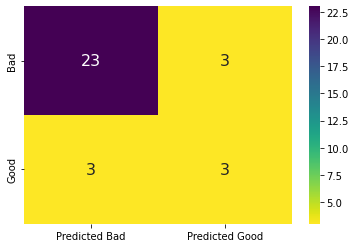

In [397]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_dtc),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

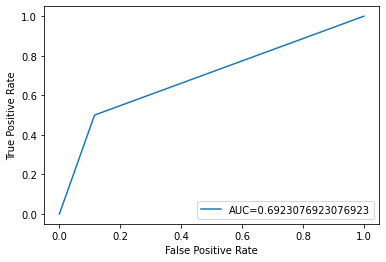

In [398]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_dtc)
auc = metrics.roc_auc_score(Y_test, Y_dtc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Ada-boost Classifier (on imbalanced data)

In [399]:
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier()

In [400]:
params = {'n_estimators':[1,10, 20, 30, 50, 100, 200, 1000, 2000, 3000, 5000], 'algorithm':['SAMME', 'SAMME.R'],'learning_rate':[1.0,1.1,1.2,1.3,1.4, 1.5, 2.0]}

In [401]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
ada_op = RandomizedSearchCV(ada, params, n_iter=20, cv=cv, scoring='f1', verbose=1, random_state=0, n_jobs=-1)

In [402]:
ada_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=AdaBoostClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [1.0, 1.1, 1.2, 1.3,
                                                          1.4, 1.5, 2.0],
                                        'n_estimators': [1, 10, 20, 30, 50, 100,
                                                         200, 1000, 2000, 3000,
                                                         5000]},
                   random_state=0, scoring='f1', verbose=1)

In [403]:
ada_op.best_params_

{'n_estimators': 2000, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}

In [404]:
ada = AdaBoostClassifier(random_state=0,n_estimators = ada_op.best_params_['n_estimators'], learning_rate = ada_op.best_params_['learning_rate'], algorithm = ada_op.best_params_['algorithm'] )

In [405]:
arr = cross_val_score(ada, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.90625   , 0.87096774, 0.96774194, 0.87096774, 0.9375    ,
       0.93548387, 0.90322581, 0.93548387, 0.9375    , 0.87096774,
       0.93548387, 0.83870968, 0.9375    , 0.93548387, 0.87096774,
       0.87096774, 0.71875   , 0.93548387, 0.90322581, 0.90322581])

In [406]:
np.mean(arr)

0.8992943548387096

In [407]:
ada.fit(X_train,Y_train.values.ravel())

AdaBoostClassifier(n_estimators=2000, random_state=0)

In [408]:
Y_ada = ada.predict(X_test)

In [409]:
confusion_matrix(Y_test,Y_ada)

array([[24,  2],
       [ 2,  4]])

In [410]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_ada, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.92      0.92      0.92        26
        good       0.67      0.67      0.67         6

    accuracy                           0.88        32
   macro avg       0.79      0.79      0.79        32
weighted avg       0.88      0.88      0.88        32



In [411]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [412]:
Y_ada

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

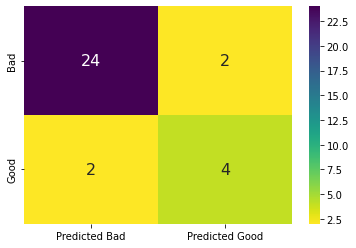

In [413]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_ada),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

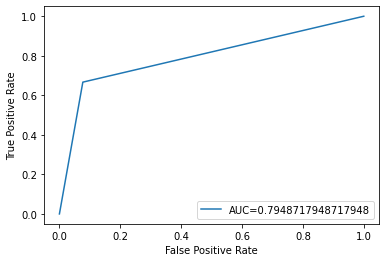

In [414]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_ada)
auc = metrics.roc_auc_score(Y_test, Y_ada)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Naive Bayes Classification (class imbalanced)

In [415]:
gnb = GaussianNB()

In [416]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}

In [417]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
gnb_op = RandomizedSearchCV(gnb, params, n_iter=20, cv=cv, scoring='f1', verbose=1, random_state=0, n_jobs=-1)

In [418]:
gnb_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=GaussianNB(), n_iter=20, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=0, scoring='f1', verbose=1)

In [419]:
gnb_op.best_params_

{'var_smoothing': 0.004328761281083057}

In [420]:
gnb = GaussianNB(var_smoothing = gnb_op.best_params_['var_smoothing'] )

In [421]:
arr = cross_val_score(gnb, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.875     , 0.83870968, 0.83870968, 0.87096774, 0.71875   ,
       0.80645161, 0.87096774, 0.87096774, 0.875     , 0.93548387,
       0.93548387, 0.67741935, 0.875     , 0.93548387, 0.87096774,
       0.74193548, 0.84375   , 0.87096774, 0.93548387, 0.83870968])

In [422]:
np.mean(arr)

0.8513104838709676

In [423]:
gnb.fit(X_train,Y_train.values.ravel())

GaussianNB(var_smoothing=0.004328761281083057)

In [424]:
Y_gnb = gnb.predict(X_test)

In [425]:
confusion_matrix(Y_test,Y_gnb)

array([[24,  2],
       [ 5,  1]])

In [426]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_gnb, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.83      0.92      0.87        26
        good       0.33      0.17      0.22         6

    accuracy                           0.78        32
   macro avg       0.58      0.54      0.55        32
weighted avg       0.73      0.78      0.75        32



In [427]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [428]:
Y_gnb

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

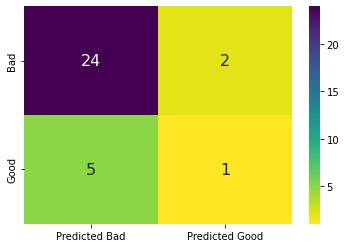

In [429]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_gnb),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

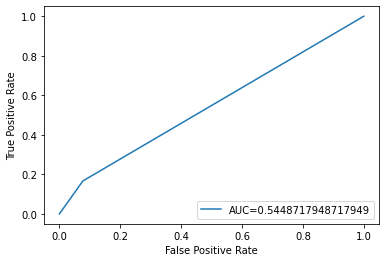

In [430]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_gnb)
auc = metrics.roc_auc_score(Y_test, Y_gnb)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# kNN Classifier

In [431]:
knn = KNeighborsClassifier()

In [432]:
params = {'leaf_size' : list(range(1,50)), 'n_neighbors' : list(range(1,30)), 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p' : [1,2], 'weights' : ['uniform', 'distance'] }

In [433]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
knn_op = RandomizedSearchCV(knn, params, n_iter=20, cv=cv, scoring='f1', verbose=1, random_state=0, n_jobs=-1)

In [434]:
knn_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 2

In [435]:
knn_op.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 1,
 'leaf_size': 36,
 'algorithm': 'kd_tree'}

In [436]:
knn = KNeighborsClassifier(weights = knn_op.best_params_['weights'], p = knn_op.best_params_['p'], n_neighbors = knn_op.best_params_['n_neighbors'], leaf_size = knn_op.best_params_['leaf_size'], algorithm = knn_op.best_params_['algorithm'])

In [437]:
arr = cross_val_score(knn, X_train, Y_train.values.ravel(), cv=cv)
arr

kundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is 

array([0.9375    , 0.87096774, 0.96774194, 0.83870968, 0.90625   ,
       0.87096774, 0.93548387, 0.87096774, 0.9375    , 0.93548387,
       0.90322581, 0.77419355, 0.9375    , 0.96774194, 0.90322581,
       0.93548387, 0.78125   , 0.90322581, 0.93548387, 0.83870968])

In [438]:
np.mean(arr)

0.8975806451612904

rves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.p

In [439]:
knn.fit(X_train,Y_train.values.ravel())

.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

KNeighborsClassifier(algorithm='kd_tree', leaf_size=36, n_neighbors=1)

In [440]:
Y_knn = knn.predict(X_test)

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [441]:
confusion_matrix(Y_test,Y_knn)

array([[25,  1],
       [ 2,  4]])

In [442]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_knn, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.93      0.96      0.94        26
        good       0.80      0.67      0.73         6

    accuracy                           0.91        32
   macro avg       0.86      0.81      0.84        32
weighted avg       0.90      0.91      0.90        32



In [443]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [444]:
Y_knn

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

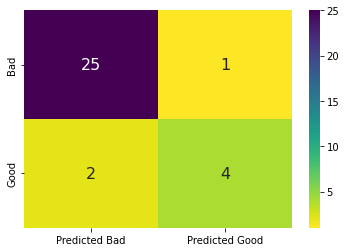

In [445]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_knn),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

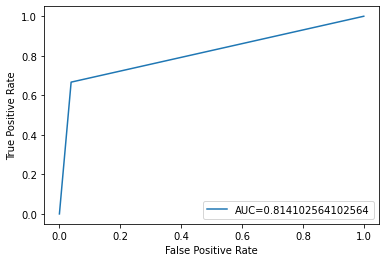

In [446]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_knn)
auc = metrics.roc_auc_score(Y_test, Y_knn)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [447]:
from sklearn import metrics
#train_idx, test_idx = scv.split(X, Y).next()
#clf = RandomForestClassifier(n_estimators=10, random_state=RNG)

#clf.fit(X[train_idx], y[train_idx])
#print X[train_idx].shape, X[test_idx].shape
Y_knn_probas = knn.predict_proba(X_test)[:,1]
Y_knn = knn.predict(X_test)

## confusion matrix
print('--confusion matrix--')
cm = metrics.confusion_matrix(Y_test, Y_knn, labels=[0,1])
print(cm)
print('--classification report --')
print(metrics.classification_report(Y_test, Y_knn, labels=[0,1]))

--confusion matrix--
[[25  1]
 [ 2  4]]
--classification report --
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.80      0.67      0.73         6

    accuracy                           0.91        32
   macro avg       0.86      0.81      0.84        32
weighted avg       0.90      0.91      0.90        32



Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUPRC = 0.595833
Accuracy = 0.906250


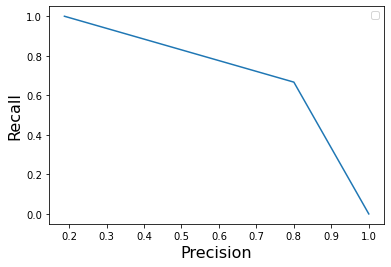

In [448]:
fig, ax = plt.subplots()

pr, rc, thresholds = metrics.precision_recall_curve(Y_test, Y_knn_probas)
ax.plot(pr, rc)

ax.legend(loc='best')
ax.set_xlabel('Precision', fontsize=16)
ax.set_ylabel('Recall', fontsize=16)
print('AUPRC = %.6f' % metrics.average_precision_score(Y_test, Y_knn_probas))
print('Accuracy = %.6f' % metrics.accuracy_score(Y_test, Y_knn))

# Model Comparison

In [449]:
models = [rf, lr, svc, xgb, ann, dtc, ada, gnb, knn]
model_pipeline = []
for i in models:
    i_model = i.fit(X_train,Y_train.values.ravel())
    model_pipeline.append(i_model)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[12:01:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [450]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#model_list = ['Logistic Regression','SVM', 'KNN','Decision Tree', 'Random Forest','Naive Bayes','AdaBoost']
model_list = ['Random Forest','Logistic Regression', 'SVC','XG Boost','Neural Network','Decision Tree','Ada Boost', 'Naive Bayes','kNN']
acc_list = []
auc_list = []
cm_list = []
f1_good_list = []
recall_good_list = []
precision_good_list = []

for model in model_pipeline:
    model.fit(X_train,Y_train.values.ravel())
    Y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test,Y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(Y_test,Y_pred))
    f1_good_list.append(f1_score(Y_test, Y_pred, labels=[1], average ='binary'))
    recall_good_list.append(recall_score(Y_test, Y_pred, labels=[1], average ='binary'))
    precision_good_list.append(precision_score(Y_test, Y_pred, labels=[1], average ='binary'))
    

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[12:01:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [451]:
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list,'F1_pred_1':f1_good_list, 'Recall_pred_1':recall_good_list, 'Precision_pred_1':precision_good_list})
df = result_df.round(3)
df.sort_values(by=['Recall_pred_1'],ascending=False)

Model  Accuracy   AUC  F1_pred_1  Recall_pred_1  \
1  Logistic Regression     0.906  0.88      0.769          0.833   
2                  SVC     0.844  0.84      0.667          0.833   
4       Neural Network     0.906  0.81      0.727          0.667   
6            Ada Boost     0.875  0.79      0.667          0.667   
8                  kNN     0.906  0.81      0.727          0.667   
0        Random Forest     0.875  0.73      0.600          0.500   
3             XG Boost     0.875  0.73      0.600          0.500   
5        Decision Tree     0.812  0.69      0.500          0.500   
7          Naive Bayes     0.781  0.54      0.222          0.167   

   Precision_pred_1  
1             0.714  
2             0.556  
4             0.800  
6             0.667  
8             0.800  
0             0.750  
3             0.750  
5             0.500  
7             0.333

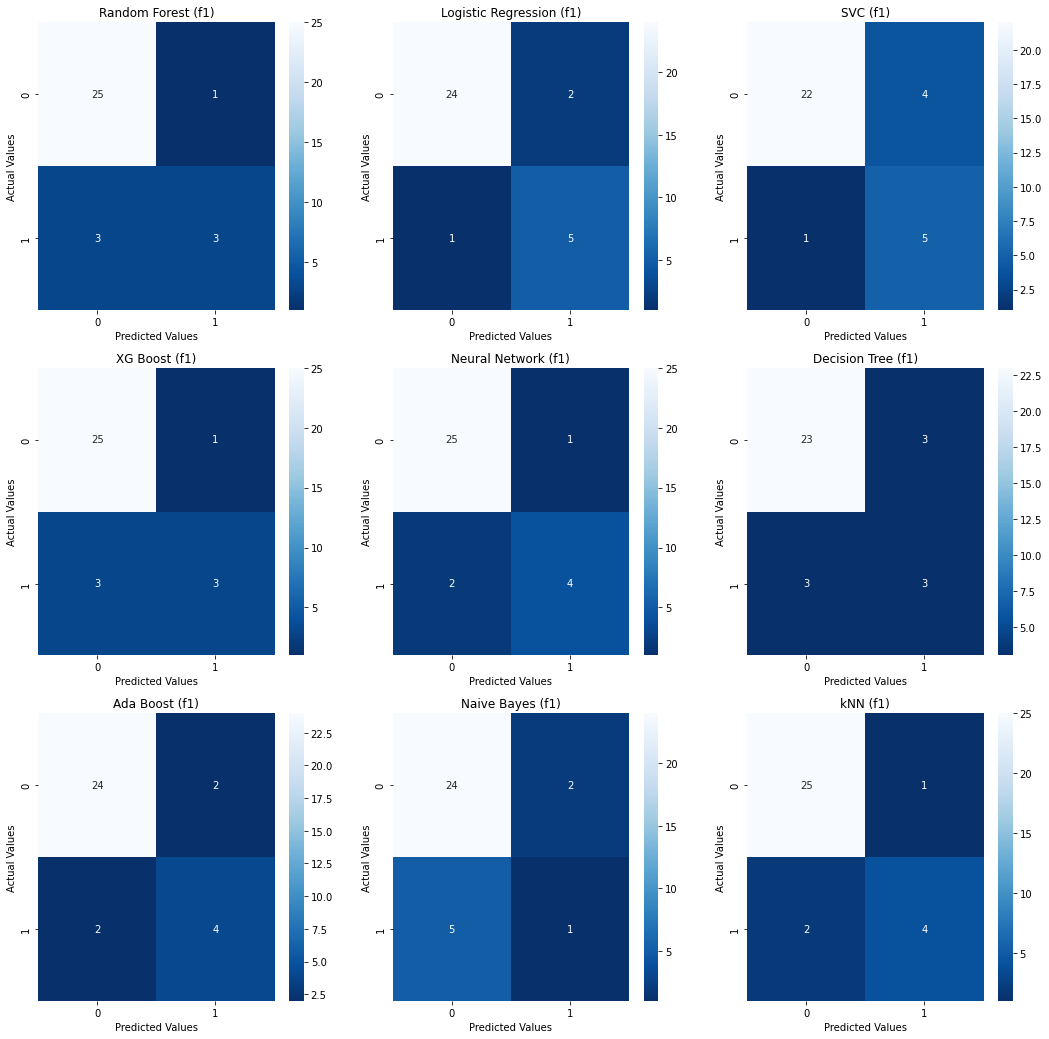

In [452]:
import seaborn as sns

fig = plt.figure(figsize = (18,18))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(3, 3, i+1).set_title(model+' (f1)')
    cm_plot = sns.heatmap(cm,annot=True, cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

def get_classification_report(y_test, y_pred):
    '''Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format'''
    from sklearn import metrics
    report = metrics.classification_report(Y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    #df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

class_rep_svc = get_classification_report(Y_test, Y_svc)
class_rep_svc['Model'] = 'SVC'
#class_rep_rf.to_csv(out_file_path+'/class_rep.csv')

class_rep_svc

# SHAP Analysis

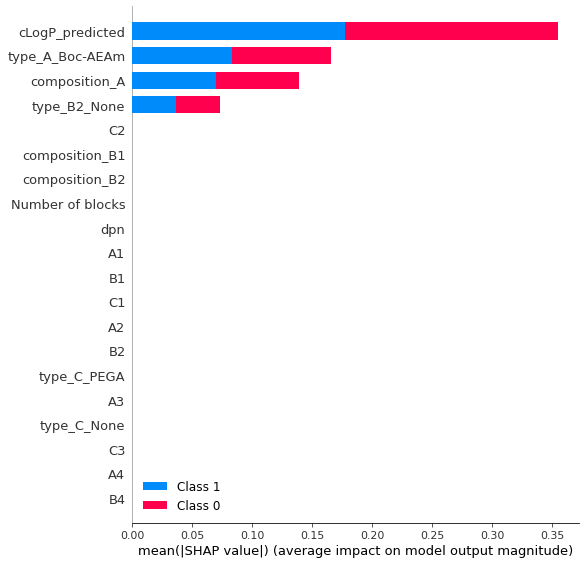

In [514]:
import shap
shap.initjs()
class_names = ['bad','good']
shap_values = shap.TreeExplainer(dtc,X_train).shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names= None)

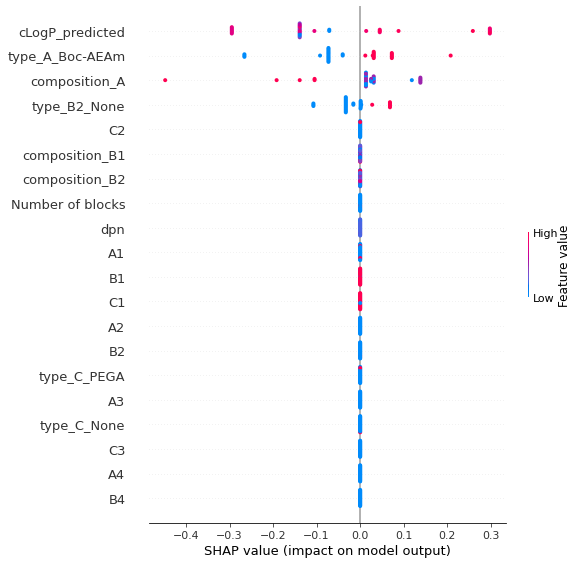

In [515]:
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

In [516]:
import shap
#class_names = ['Bad','Good']
#explainer = shap.Explainer(dtc)

shap.initjs()


In [517]:
explainer = shap.KernelExplainer(dtc.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Using 125 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


  0%|          | 0/32 [00:00<?, ?it/s]

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage.

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

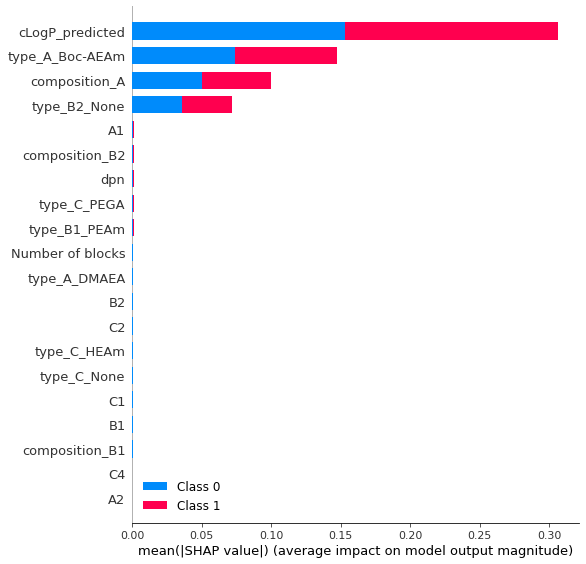

In [518]:
explainer = shap.KernelExplainer(dtc.predict_proba, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

explainer = shap.KernelExplainer(dtc.predict_proba, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

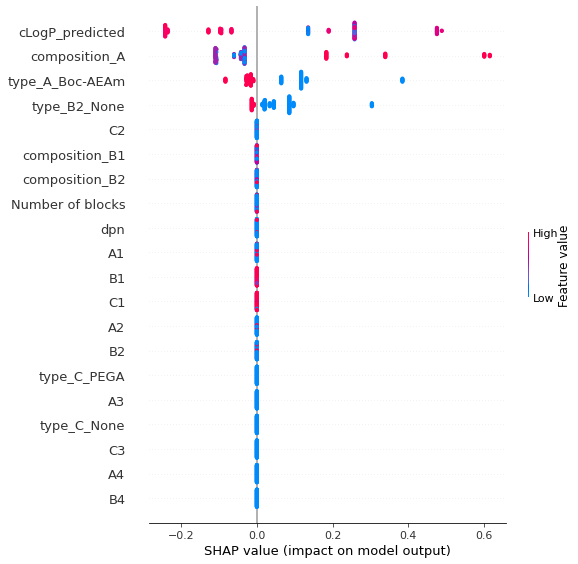

In [519]:
explainer = shap.TreeExplainer(dtc)
shap_values = explainer.shap_values(X_scaled)
shap.summary_plot(shap_values[0], X_scaled)

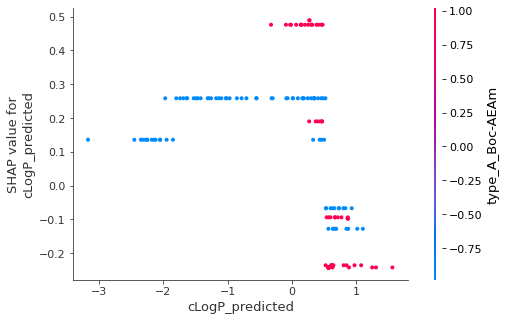

In [520]:
shap.dependence_plot('cLogP_predicted', shap_values[0], X_scaled)

# shap_values = explainer.shap_values(X_test)
explainer = shap.KernelExplainer(dtc.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

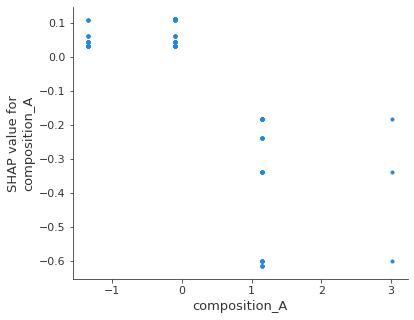

In [521]:
shap.dependence_plot("composition_A", shap_values[1], X_scaled,interaction_index=None)

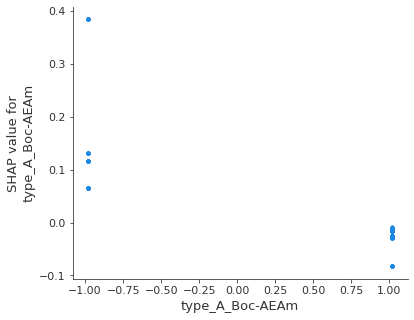

In [522]:
shap.dependence_plot("type_A_Boc-AEAm", shap_values[0], X_scaled,interaction_index=None)

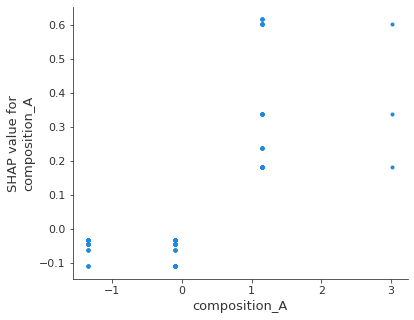

In [523]:
shap.dependence_plot("composition_A", shap_values[0], X_scaled,interaction_index=None)

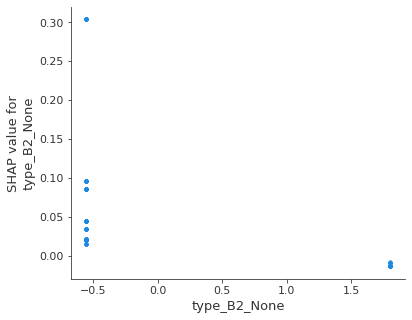

In [524]:
shap.dependence_plot("type_B2_None", shap_values[0], X_scaled,interaction_index=None)

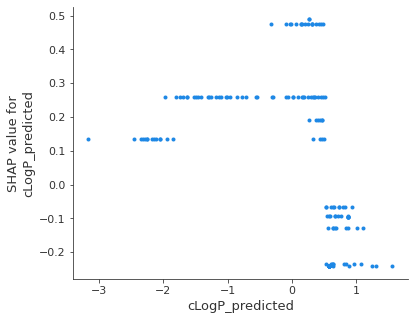

In [248]:
shap.dependence_plot("cLogP_predicted", shap_values[0], X_scaled,interaction_index=None)

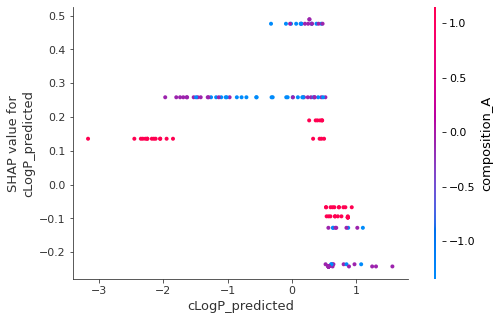

In [249]:
shap.dependence_plot("cLogP_predicted", shap_values[0], X_scaled,interaction_index='composition_A')

In [250]:
shap_values

[array([[-0.10950919,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.10950919,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.10950919,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.03264303,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03264303,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03264303,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[0.10950919, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.10950919, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.10950919, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.03264303, 0.        , 0.        , ..., 0.        , 0.        

In [251]:
shap_values_df=pd.DataFrame(shap_values[1])

In [252]:
shap_values_df

0    1    2    3    4    5    6    7    8    9   ...   15   16  \
0    0.109509  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1    0.109509  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2    0.109509  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3   -0.615586  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4   -0.615586  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
..        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
152  0.032643  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
153  0.032643  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
154  0.032643  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
155  0.032643  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
156  0.032643  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

           17        18   19   20        21   22   23   24  
0    0.242308  0.015943  0.0  0.0  0.013596  0.0  0.0  0.0  
1    0.242308  0.015943  0.0  0.0  0.013596  0.0  0.0  0.0  
2    0.242308  0.015943  0.0  0.0  0.013596  0.0  0.0  0.0  
3    0.097307  0.009640  0.0  0.0  0.008639  0.0  0.0  0.0  
4    0.097307  0.009640  0.0  0.0  0.008639  0.0  0.0  0.0  
..        ...       ...  ...  ...       ...  ...  ...  ...  
152 -0.258139 -0.116993  0.0  0.0 -0.085688  0.0  0.0  0.0  
153 -0.258139 -0.116993  0.0  0.0 -0.085688  0.0  0.0  0.0  
154 -0.258139 -0.116993  0.0  0.0 -0.085688  0.0  0.0  0.0  
155 -0.258139 -0.116993  0.0  0.0 -0.085688  0.0  0.0  0.0  
156 -0.258139 -0.116993  0.0  0.0 -0.085688  0.0  0.0  0.0  

[157 rows x 25 columns]

[10:57:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:42] WARNING: /Users/runner/miniforge3/cond

[10:57:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:40] WARNING: /Users/runner/miniforge3/cond

[10:57:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:42] WARNING: /Users/runner/miniforge3/cond

[10:57:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:40] WARNING: /Users/runner/miniforge3/cond

[10:57:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:42] WARNING: /Users/runner/miniforge3/cond

[10:57:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:40] WARNING: /Users/runner/miniforge3/cond

In [253]:
import shap
shap.initjs()

In [255]:
explainer = shap.TreeExplainer(dtc)
shap_values = explainer.shap_values(X_train)
print('Expected Value:', explainer.expected_value)

Expected Value: [0.5 0.5]


In [258]:
print("Shap Values for 'Good' class")
pd.DataFrame(shap_values[0],columns=X_train.columns).head()

Shap Values for 'Good' class


composition_A  composition_B1  composition_B2  Number of blocks  dpn   A1  \
0      -0.032643             0.0             0.0               0.0  0.0  0.0   
1      -0.106891             0.0             0.0               0.0  0.0  0.0   
2      -0.032643             0.0             0.0               0.0  0.0  0.0   
3       0.600870             0.0             0.0               0.0  0.0  0.0   
4      -0.042294             0.0             0.0               0.0  0.0  0.0   

    B1   C1   A2   B2  ...   B4   C4  cLogP_predicted  type_A_Boc-AEAm  \
0  0.0  0.0  0.0  0.0  ...  0.0  0.0         0.258139         0.116993   
1  0.0  0.0  0.0  0.0  ...  0.0  0.0        -0.235877        -0.083112   
2  0.0  0.0  0.0  0.0  ...  0.0  0.0         0.258139         0.116993   
3  0.0  0.0  0.0  0.0  ...  0.0  0.0        -0.094086        -0.028351   
4  0.0  0.0  0.0  0.0  ...  0.0  0.0         0.475664        -0.025285   

   type_A_DMAEA  type_B1_PEAm  type_B2_None  type_C_HEAm  type_C_None  \
0           0.0           0.0      0.085688          0.0          0.0   
1           0.0           0.0      0.033942          0.0          0.0   
2           0.0           0.0      0.085688          0.0          0.0   
3           0.0           0.0      0.021566          0.0          0.0   
4           0.0           0.0      0.020092          0.0          0.0   

   type_C_PEGA  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 25 columns]

In [259]:
print("Shap Values for 'Bad' class")
pd.DataFrame(shap_values[1],columns=X_train.columns).head()

Shap Values for 'Bad' class


composition_A  composition_B1  composition_B2  Number of blocks  dpn   A1  \
0       0.032643             0.0             0.0               0.0  0.0  0.0   
1       0.106891             0.0             0.0               0.0  0.0  0.0   
2       0.032643             0.0             0.0               0.0  0.0  0.0   
3      -0.600870             0.0             0.0               0.0  0.0  0.0   
4       0.042294             0.0             0.0               0.0  0.0  0.0   

    B1   C1   A2   B2  ...   B4   C4  cLogP_predicted  type_A_Boc-AEAm  \
0  0.0  0.0  0.0  0.0  ...  0.0  0.0        -0.258139        -0.116993   
1  0.0  0.0  0.0  0.0  ...  0.0  0.0         0.235877         0.083112   
2  0.0  0.0  0.0  0.0  ...  0.0  0.0        -0.258139        -0.116993   
3  0.0  0.0  0.0  0.0  ...  0.0  0.0         0.094086         0.028351   
4  0.0  0.0  0.0  0.0  ...  0.0  0.0        -0.475664         0.025285   

   type_A_DMAEA  type_B1_PEAm  type_B2_None  type_C_HEAm  type_C_None  \
0           0.0           0.0     -0.085688          0.0          0.0   
1           0.0           0.0     -0.033942          0.0          0.0   
2           0.0           0.0     -0.085688          0.0          0.0   
3           0.0           0.0     -0.021566          0.0          0.0   
4           0.0           0.0     -0.020092          0.0          0.0   

   type_C_PEGA  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 25 columns]

In [260]:
X_train.iloc[0], 

(composition_A      -1.347681
 composition_B1      1.809309
 composition_B2     -0.720559
 Number of blocks   -0.382977
 dpn                -0.163249
 A1                 -0.184463
 B1                  0.353758
 C1                  0.437195
 A2                 -0.176477
 B2                 -0.316488
 C2                 -0.297511
 A3                 -0.161690
 B3                 -0.153193
 C3                 -0.131448
 A4                  0.000000
 B4                 -0.113592
 C4                 -0.113592
 cLogP_predicted    -0.549858
 type_A_Boc-AEAm    -0.981071
 type_A_DMAEA       -0.584705
 type_B1_PEAm        0.139573
 type_B2_None       -0.555278
 type_C_HEAm         0.246598
 type_C_None        -0.181369
 type_C_PEGA        -0.113592
 Name: 149, dtype: float64,)

In [261]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],
shap_values[0][0,:], X_train.iloc[0])

In [262]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],
shap_values[1][0,:], X_train.iloc[0,:])

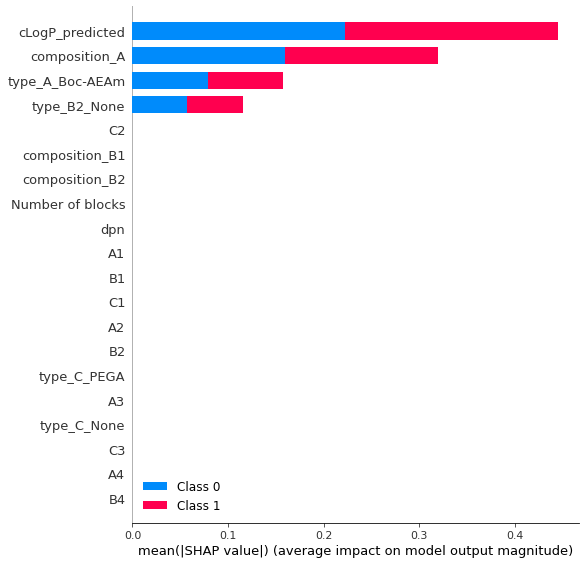

In [263]:
shap.initjs()
shap.summary_plot(shap_values, X_test)


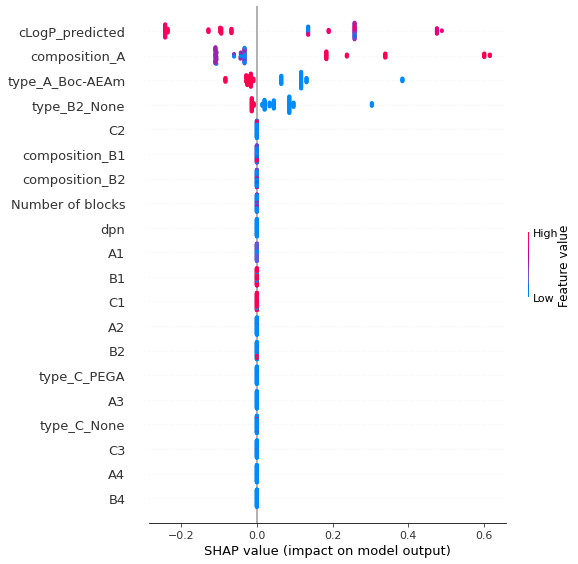

In [264]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

AssertionError: Feature and SHAP matrices must have the same number of rows!

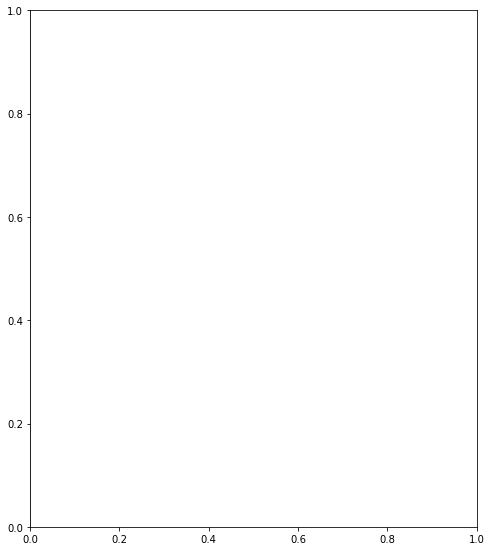

In [279]:
shap.initjs()
shap.summary_plot(shap_values[1], X_scaled)

# SHAP Values for test set

In [275]:
explainer = shap.TreeExplainer(dtc)
shap_values_test = explainer.shap_values(X_test)

In [277]:
Y_pred=dtc.predict(X_test)
misclassified = Y_test != Y_pred
sum(misclassified)

ValueError: Unable to coerce to Series, length must be 1: given 32

In [273]:
pred_true_tbl=pd.DataFrame({'True':Y_test,'Pred':y_pred,'Misclassified':misclassified})
display(pred_true_tbl[pred_true_tbl.Misclassified==True])
print(np.where(pred_true_tbl.Misclassified==True))

NameError: name 'misclassified' is not defined

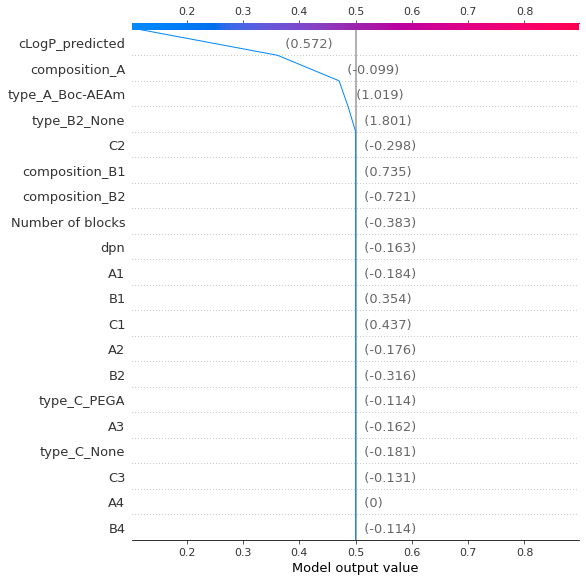

In [274]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values_test[0][3,:], X_test.iloc[3,:])

# Linear Explainer (SHAP)

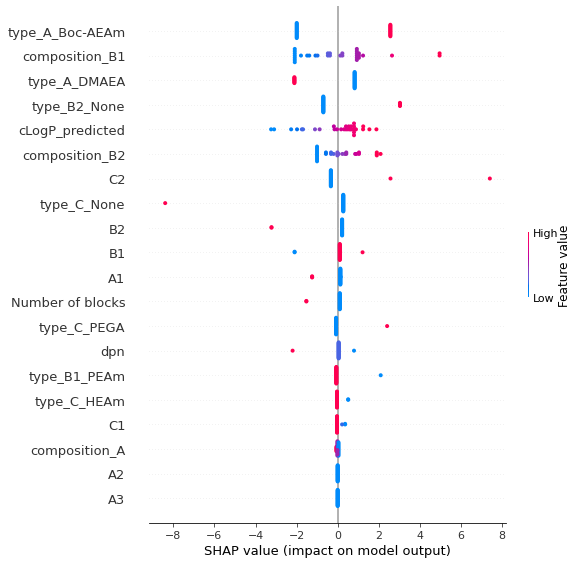

In [471]:
import shap
shap.initjs()
class_names = ['bad','good']
masker = shap.maskers.Independent(data = X_test)
shap_values = shap.LinearExplainer(lr,masker = masker).shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names= None)

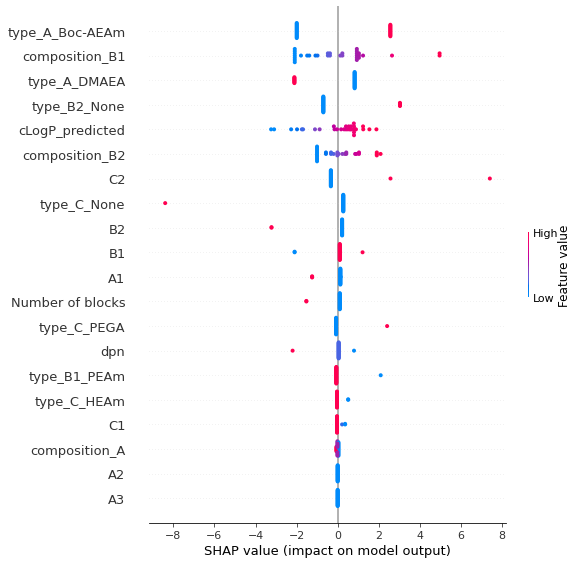

In [472]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

In [475]:
print("Shap Values for 'Good' class")
pd.DataFrame(shap_values,columns=X_train.columns).head()

Shap Values for 'Good' class


composition_A  composition_B1  composition_B2  Number of blocks       dpn  \
0      -0.012635       -2.089660        1.036110          0.101727  0.046692   
1      -0.063176       -1.787540       -0.572180          0.101727  0.046692   
2      -0.012635        0.931535       -1.005182         -1.525908  0.046692   
3      -0.012635        0.931535       -1.005182          0.101727  0.046692   
4       0.037906        0.226590        1.902113          0.101727  0.046692   

         A1        B1        C1   A2        B2  ...   B4   C4  \
0  0.128123  0.102335 -0.032235 -0.0  0.214800  ...  0.0  0.0   
1  0.128123  0.102335 -0.032235 -0.0  0.214800  ...  0.0  0.0   
2 -1.245354 -2.097342  0.213920 -0.0 -3.221997  ...  0.0  0.0   
3  0.128123  0.102335 -0.032235 -0.0  0.214800  ...  0.0  0.0   
4  0.128123  0.102335 -0.032235 -0.0  0.214800  ...  0.0  0.0   

   cLogP_predicted  type_A_Boc-AEAm  type_A_DMAEA  type_B1_PEAm  type_B2_None  \
0         0.397002         2.562611      0.824873     -0.067534     -0.699336   
1         0.536568         2.562611      0.824873     -0.067534     -0.699336   
2         0.793836         2.562611      0.824873     -0.067534      3.030456   
3         0.793836         2.562611      0.824873     -0.067534      3.030456   
4        -0.878742        -1.993142      0.824873     -0.067534     -0.699336   

   type_C_HEAm  type_C_None  type_C_PEGA  
0    -0.033975     0.270876    -0.077584  
1    -0.033975     0.270876    -0.077584  
2    -0.033975     0.270876    -0.077584  
3    -0.033975     0.270876    -0.077584  
4    -0.033975     0.270876    -0.077584  

[5 rows x 25 columns]